# Mortgage Risk Analyzer

## Intro
This is a summary of my learnings about Mortgages over the past week.  
I always knew the direct porpotionalitites of Mortgage principles. For example, I knew that it's better to have a low intrest rate and to make more-than-minimum payments.  
However, I did not know how much money would equate to a 0.7% difference in intrest rate.  
In search of more knowledge, I watched this Khan academy video: https://www.khanacademy.org/economics-finance-domain/core-finance/housing/mortgages-tutorial/v/introduction-to-mortgage-loans  
I learned from this video that there is a tax deduction for the interest accured on the mortgage. This made me think. Because if there are tax benefits, then that means that it might be beneficial to have more interest longer. So I sought out discover the relationships between all the variables that are used to calculate mortgages.

## Strategy
Our goal is to minimize x. Where x is defined as:

In [1]:
from sympy import *
from sympy.abc import i, k, m, n, x
from sympy import init_printing
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
init_printing() 
expenses = symbols('Expenses')
adjustedHousePrice = symbols('AdjustedHousePrice')
housePrice = symbols('HousePrice')
downPayment = symbols('DownPayment')
payments = symbols('Payments')
taxSavings = symbols('TaxSavings')
Eq(x, adjustedHousePrice/housePrice)

The Adjusted House Price is just the overall amount of money spent and saved when purchasing a house:

In [2]:
Eq(adjustedHousePrice, expenses-taxSavings)

In [3]:
Eq(expenses, downPayment+payments)

## Implementation
We will consider the following variables. Let's define a range for each. These ranges can be adjusted.

In [4]:
variables = [ # start, stop, step
    [x / 1000  for x in range(30, 100, 2)], # intrest rate (%) - min 0%
    [x * 1000 for x in range(100, 10000, 100)], # house price ($) - min $0
    [x / 100  for x in range(10, 50, 1)], # down payment (%) - min 0% max 100%
    list(range(10, 50, 1)), # term (years) - min 0 years
    [x / 100  for x in range(20, 50, 1)], # tax rate (%) - min 0% max 100%
    [x / 10  for x in range(10, 40, 1)], # min payment multiplyer - min 1
]

Now we will define constants of each varialble. THese can be adjusted as well. When we anylize each variable, we will keep the others constant.

In [5]:
constants = [
    5 / 100,  # intrest rate (%)
    200 * 1000,  # house price ($)
    30 / 100, # down payment (%)
    30, # term (years)
    30 / 100, # tax rate (%)
    1.5 # min payment multiplyer
]

This function calculates x. It goes through each month and calculates the monthly payment amount, intrest & tax savins.

In [6]:
def calculateX(intrestRate, housePrice, downPayment, term, taxRate, minPaymentMuliplyer):
    n = 12*term
    monthlyInterestRate = intrestRate / 12
    r = 1/(1+monthlyInterestRate)
    loan = housePrice * (1-downPayment)
    minPayment = loan * ((1-r)/(r-r**(n+1)))
    payment = minPayment * minPaymentMuliplyer
    paymentSum = 0
    taxSavingsSum = 0
    while loan > 1:
        # 1 month passes
        interest = loan * monthlyInterestRate
        taxSavingsSum += interest * taxRate
        p = payment
        if interest + loan < payment:
            p = interest + loan
        loan = loan - p + interest
        paymentSum += p
    expenses = paymentSum + (housePrice * downPayment)
    x = (expenses - taxSavingsSum) / housePrice
    return x
    
        

In [7]:
def graph(x,y,xlabel):
    plt.figure()
    plt.xlabel(xlabel)
    plt.ylabel('Percent of House Price')
    plt.plot(x, y, '-ok')
    plt.show()

## Execution
Now lets go through each variable and calculate x for each. See the graphs output below.

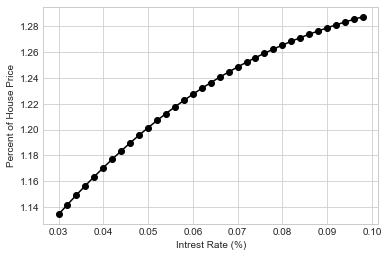

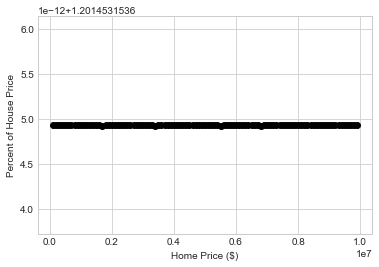

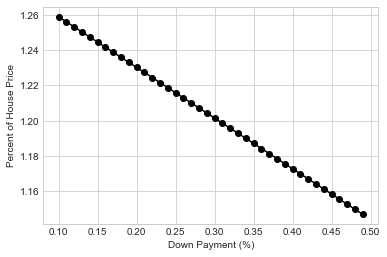

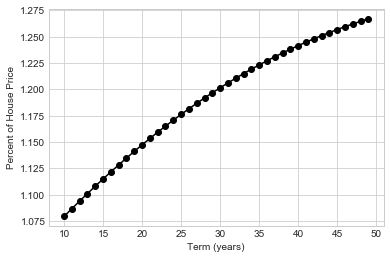

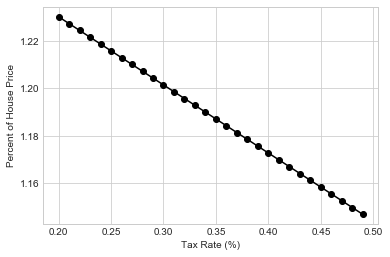

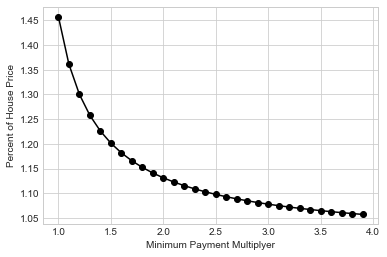

In [8]:
i = 0
for var in variables:
    a = constants[0]
    b = constants[1]
    c = constants[2]
    d = constants[3]
    e = constants[4]
    f = constants[5]
    output = []
    xlabel = ''
    for v in var:
        if i == 0:
            a = v
            xlabel = 'Intrest Rate (%)'
        if i == 1:
            b = v
            xlabel = 'Home Price ($)'
        if i == 2:
            c = v
            xlabel = 'Down Payment (%)'
        if i == 3:
            d = v
            xlabel = 'Term (years)'
        if i == 4:
            e = v
            xlabel = 'Tax Rate (%)'
        if i == 5:
            f = v
            xlabel = 'Minimum Payment Multiplyer'
        output.append(calculateX(a,b,c,d,e,f))
    graph(var, output, xlabel)
    i += 1

## Interpretation
1. There is a positive relationship between x and interest rate as expected. Example:  
intrest rate of 5% vs 7% assuming house price of \\$500,000  
If interest rate = 5%, then x = 1.2. If x = 1.2, then this means than the adjusted house price is \\$600k  
If interest rate = 7%, then x = 1.25. If x = 1.25, then this means than the adjusted house price is \\$625k  
Therefore 2% increase in interest rate roughfly equals an increase of \\$25k that we would have to pay.  

2. There is no relationship between x and home price, meaning that the ratio of "Adjusted House Price" to "House Price" remains constant as House Price changes.

3. There is a linear relationship between x and down payment, tax rate, and term.

4. The most interesting find is the last graph. There seems to be an inverse relationship between x and the "Minimum Payment Multiplyer". This means that if one can pay twice the minimum payment per month, there are large savings. However, the difference between twice the minimum payment per month and tree times the minimum payment per month is not as much. See below for an example of this analysis.

In [9]:
housePrice = 500000
print('If a house costs '+str(housePrice))

intrestRate = 0.05
downPayment = 0.20
term = 30
taxRate = 0.30
minPaymentMuliplyer = 1
option1 = calculateX(intrestRate, housePrice, downPayment, term, taxRate, minPaymentMuliplyer) # the lesw better option
print('Option 1 x = '+str(option1))

minPaymentMuliplyer = 2
option2 = calculateX(intrestRate, housePrice, downPayment, term, taxRate, minPaymentMuliplyer) # the better option
print('Option 2 x = '+str(option2))

diff = option1 - option2
dollarsDiff = housePrice * diff
print('Option 2 is $'+str(round(dollarsDiff,2))+' more than Option 1')

If a house costs 500000
Option 1 x = 1.5222323919924534
Option 2 x = 1.1502159810905208
Option 2 is $186008.21 more than Option 1


## Conclusion
So if you can pay 2 times the minimum monthly amount, then you save \\$186k on a \\$500k house. There are many other assumptions I didn't consider. But this is a start.